# Lab #3- Jaide Swanson

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Problem 1

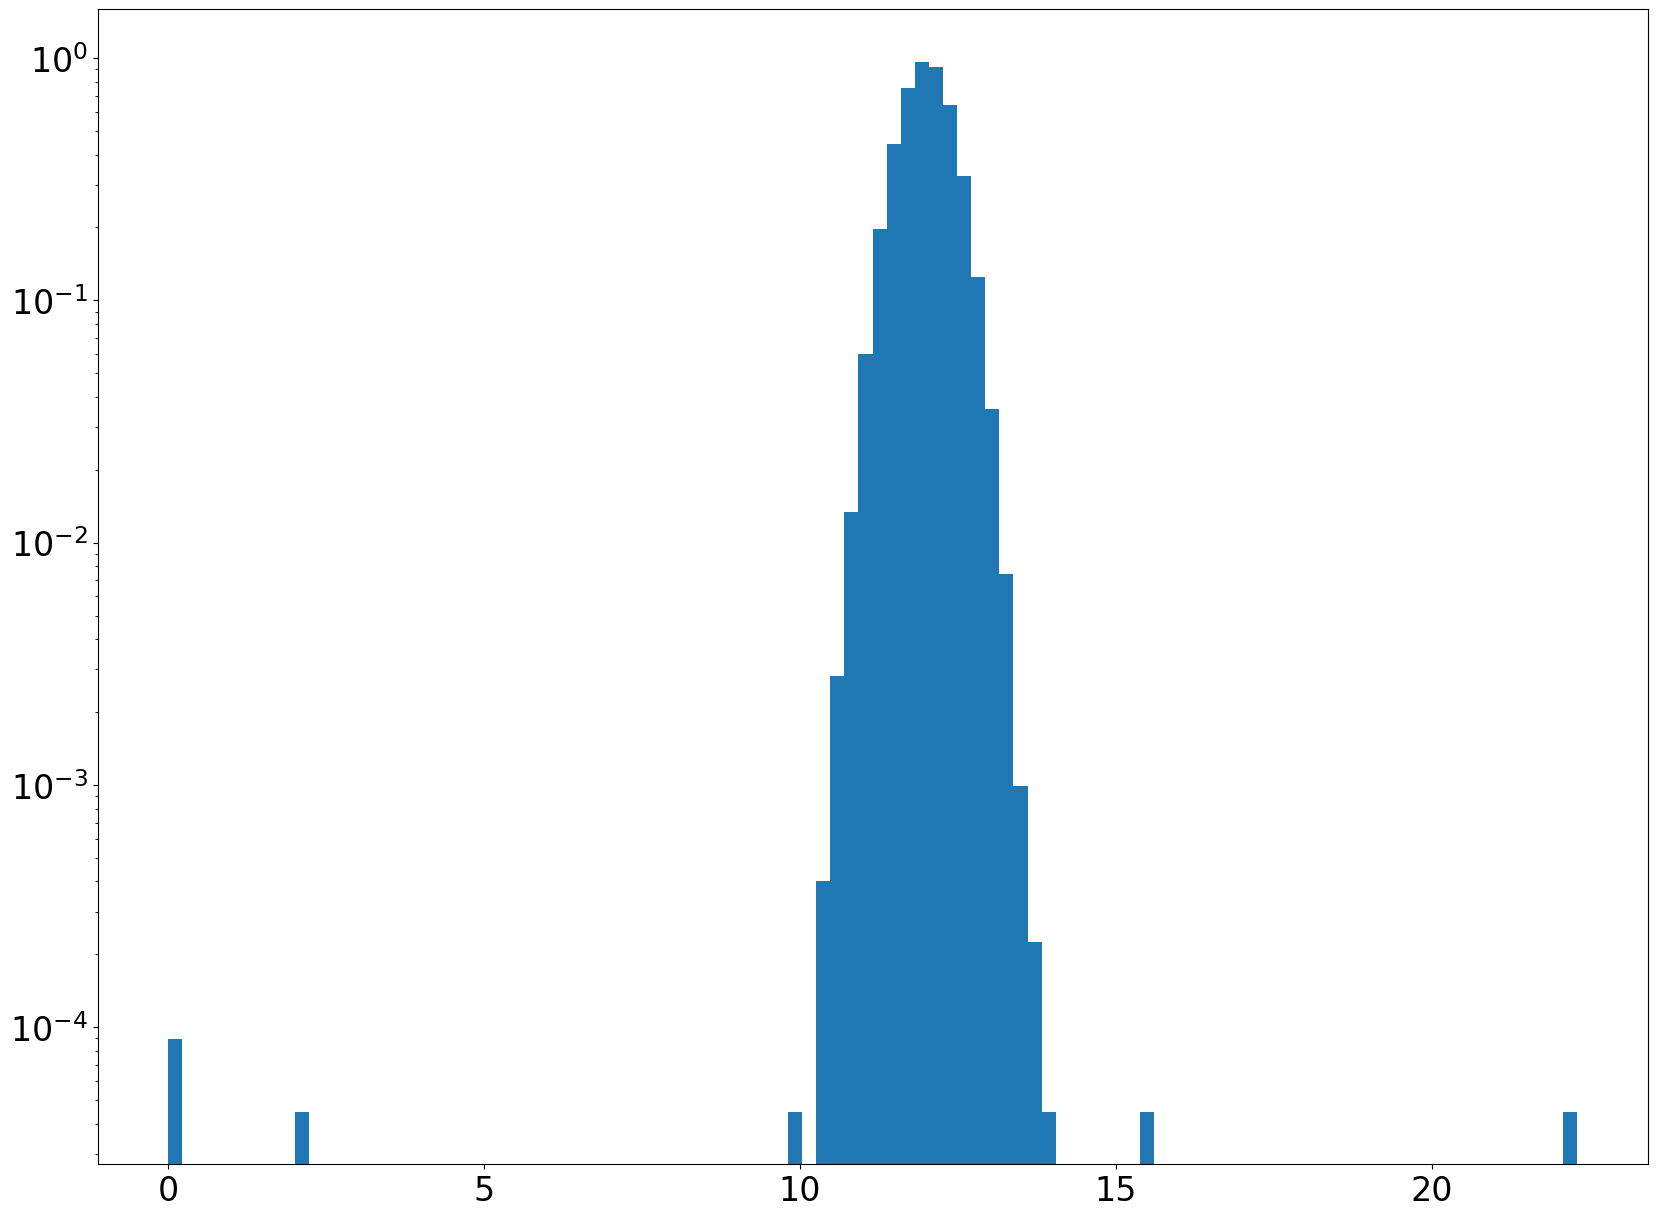

In [6]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

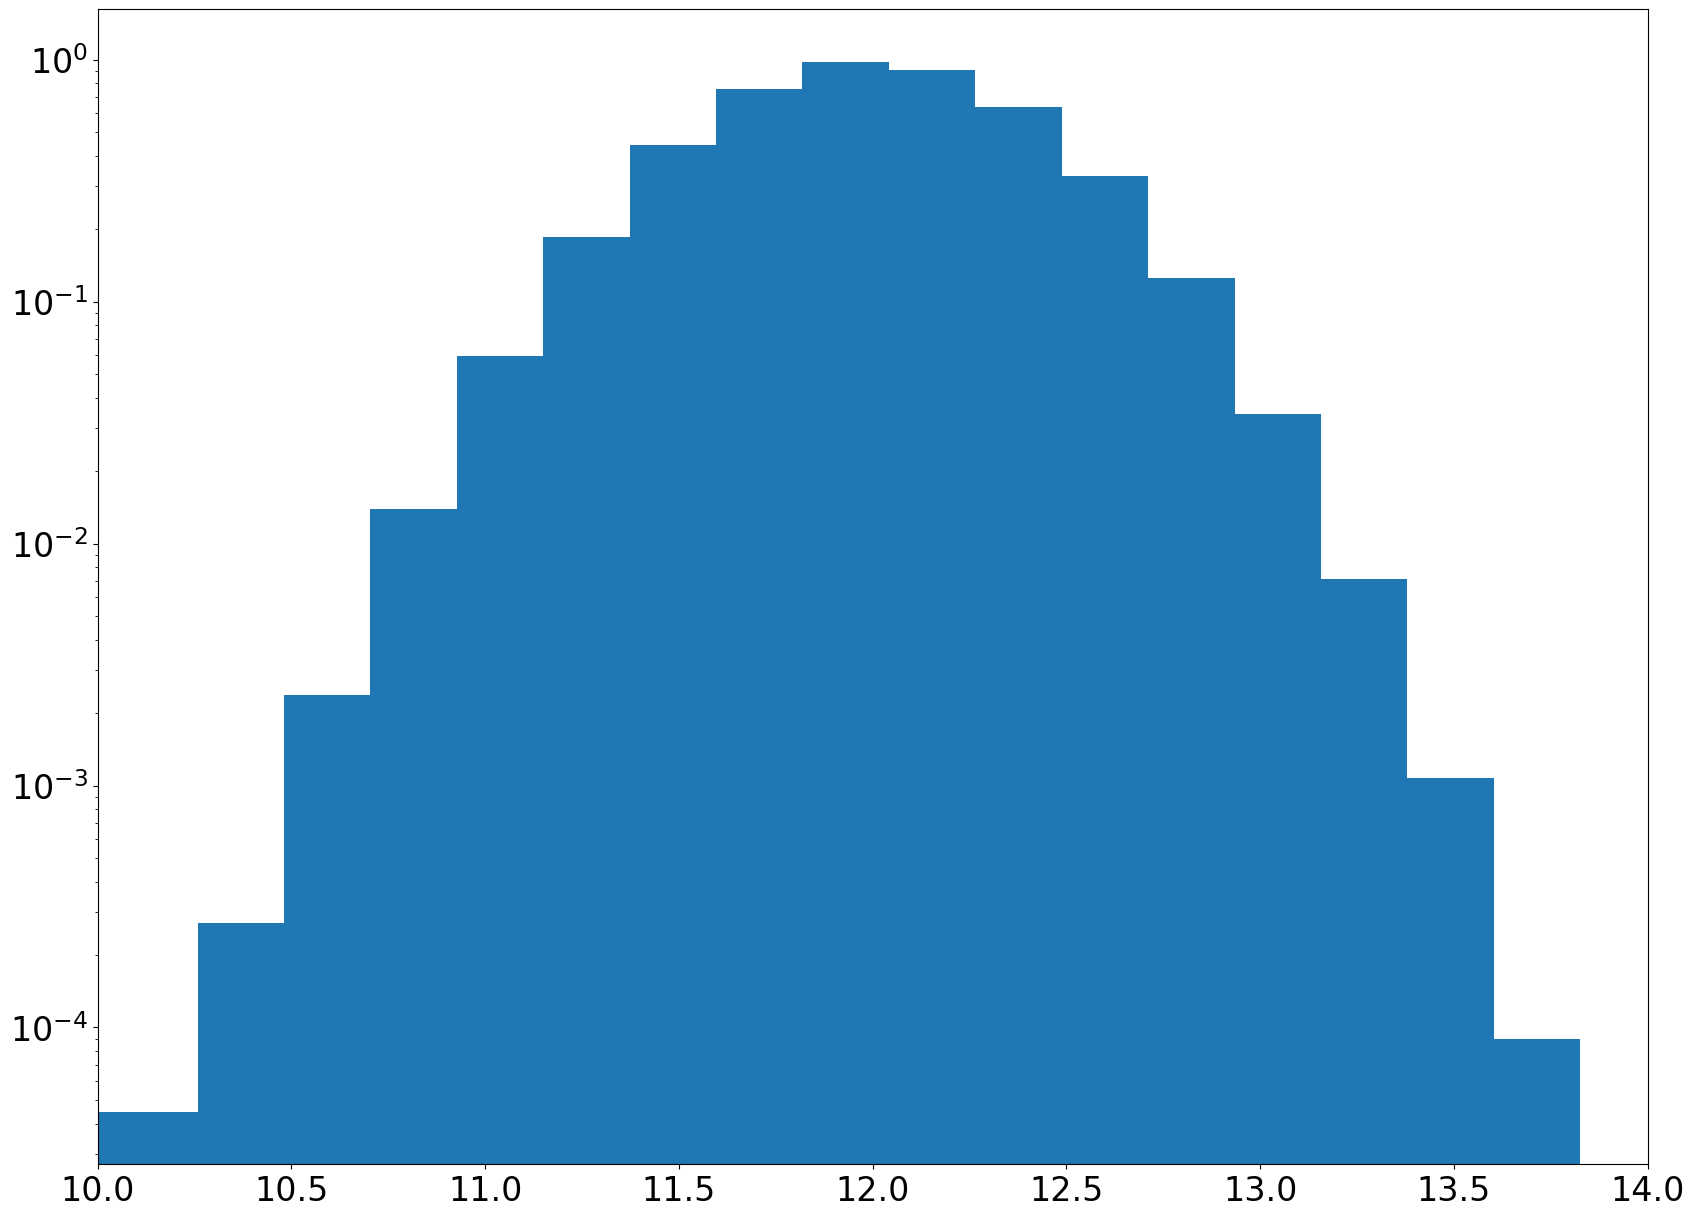

In [7]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlim([10,14])
plt.show()

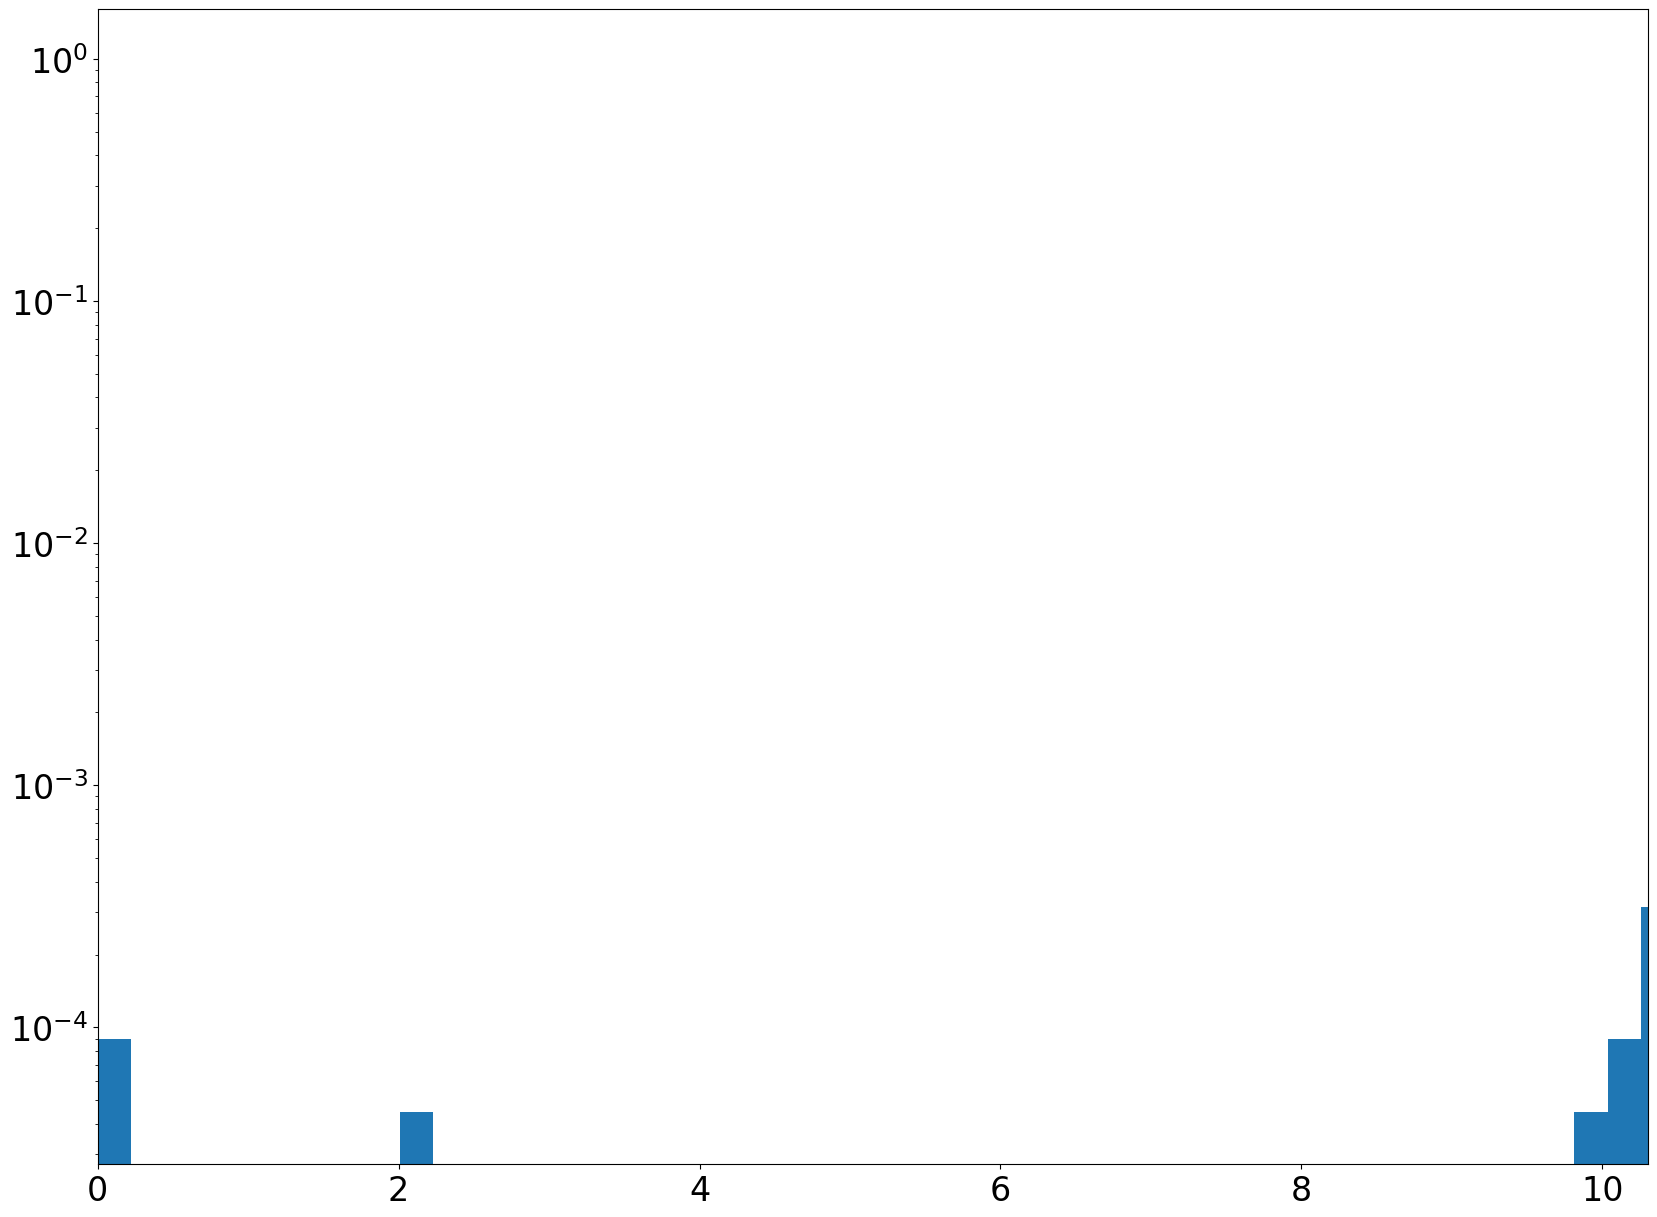

In [8]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlim([0,10.3])
plt.show()

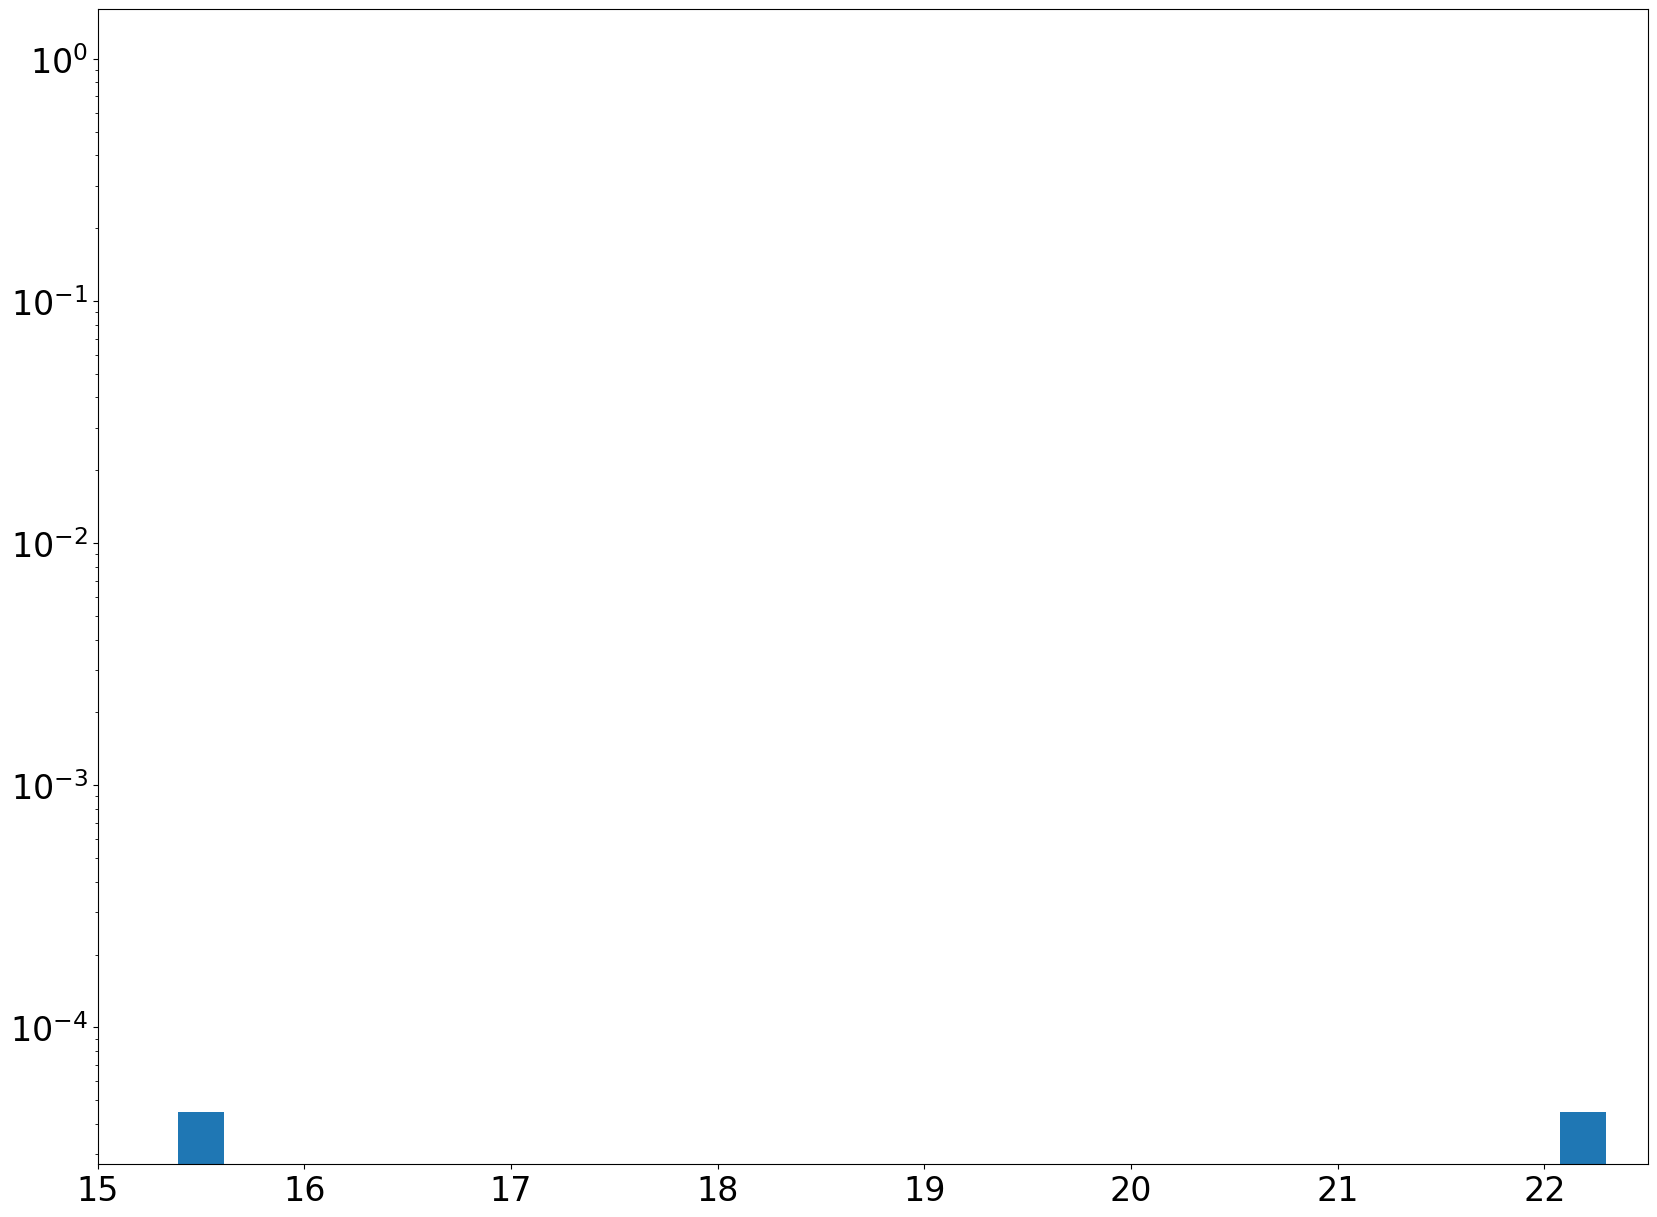

In [9]:
#d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlim([15,22.5])
plt.show()

By isolating the plots to the specific groups of outliers we can see how the distribution looks outside of the expected distribution a determine the bad data points leading us to ask the statistical question:

What is the probability the signal free data produces a signal more than 5 sigma away from the mean?

This can be computed by taking the integrals of the values that produce a probability associated with a 5 sigma result for a standard normal distribution. 

In [10]:
len(d)

100008

In [11]:
prob= stats.norm.sf(14,loc = 12., scale = 0.4)
prob

2.866515718791933e-07

In [12]:
stats.norm.isf(prob)

5.000000000000001

In [13]:
prob2= stats.norm.sf(10.5,loc = 12., scale = 0.4)

In [14]:
stats.norm.sf(4)

3.167124183311986e-05

In [15]:
stats.norm.isf(3.167124183311986e-05,loc = 12., scale = 0.4 )

13.600000000000001

In [16]:
stats.norm.cdf(-4)

3.167124183311986e-05

In [17]:
stats.norm.ppf(3.167124183311986e-05, loc=12., scale=0.4)

10.399999999999999

In [23]:
bad_data=[]
for value in d:
    if value < 10. or value > 14:
        bad_data=np.append(bad_data,value)
print(bad_data)

[ 2.1  0.   0.  15.6 22.3]


In [24]:
bad_data=[]
for value in d:
    if value < 10.4 or value > 13.6:
        bad_data=np.append(bad_data,value)
print(bad_data)

[10.28979861 13.6709214  13.7057333  13.71618275 13.65324239 10.2041633
 13.61674793 10.15889099 10.         10.3         2.1         0.
  0.         15.6        22.3       ]


In [25]:
import pandas as pd

In [26]:
data = {'True Good Data': [10000,0],
        'True Bad Data': [3,5]
        }
df = pd.DataFrame(data, index=['NN Good Data','NN Bad Data'])

print (df)

              True Good Data  True Bad Data
NN Good Data           10000              3
NN Bad Data                0              5


In [27]:
data2 = {'True Good Data': [9991,9],
        'True Bad Data': [1,7]
        }
df2 = pd.DataFrame(data2, index=['NN Good Data','NN Bad Data'])

print (df2)

              True Good Data  True Bad Data
NN Good Data            9991              1
NN Bad Data                9              7


By setting the threshold to determine bad data at values with larger than a 5 sigma probability this identifies 5 of the 8 bad data points ands does not misidentify any of the good data points which is shown in the first truth table. Even by changing the threshold to values with a 4 sigma probability or larger there is no way to remove all these known bad data points without affecting the good data points which is shown in the second truth table which removes all but one bad data points but starts misidentifying good data points. 

# Problem 2

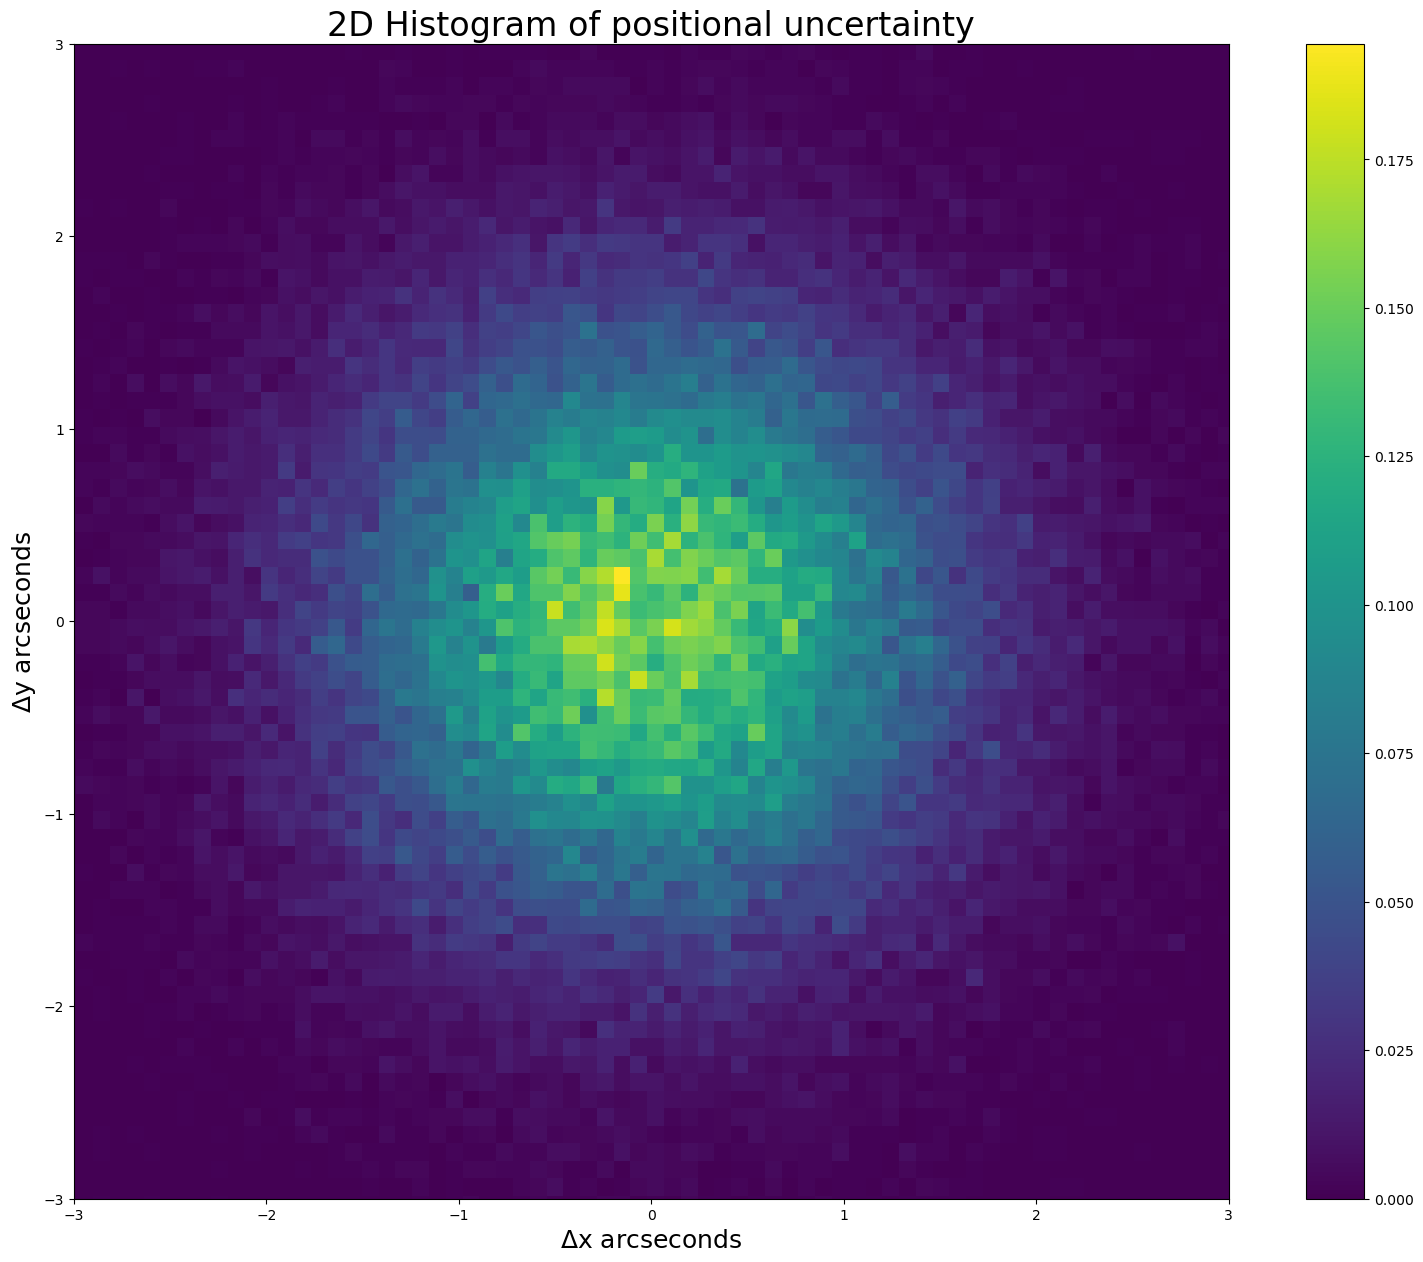

In [37]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

In [38]:
z= np.sqrt((a[0]**2)+(a[1])**2)

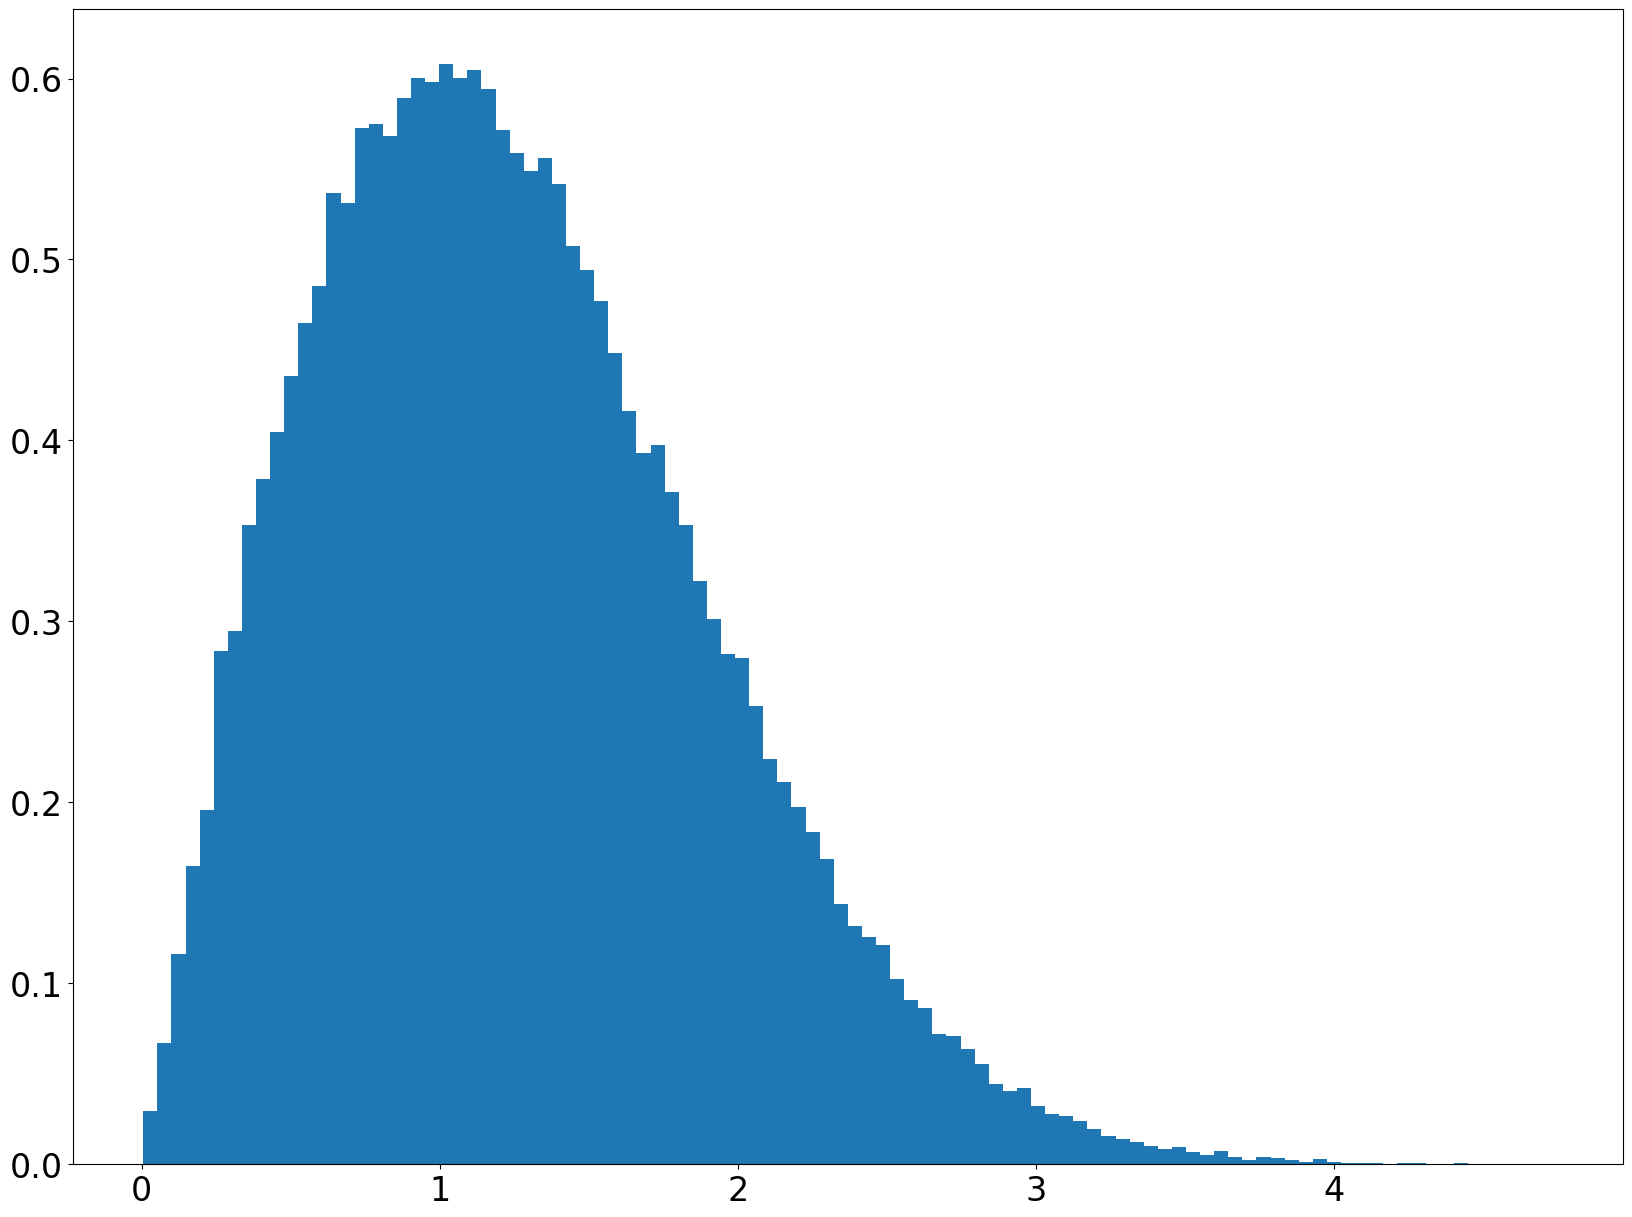

In [39]:
fig, ax = plt.subplots(1, 1)
ax.hist(z,100, density=True)
plt.tick_params(labelsize = 24)
#plt.yscale('log')
plt.show()

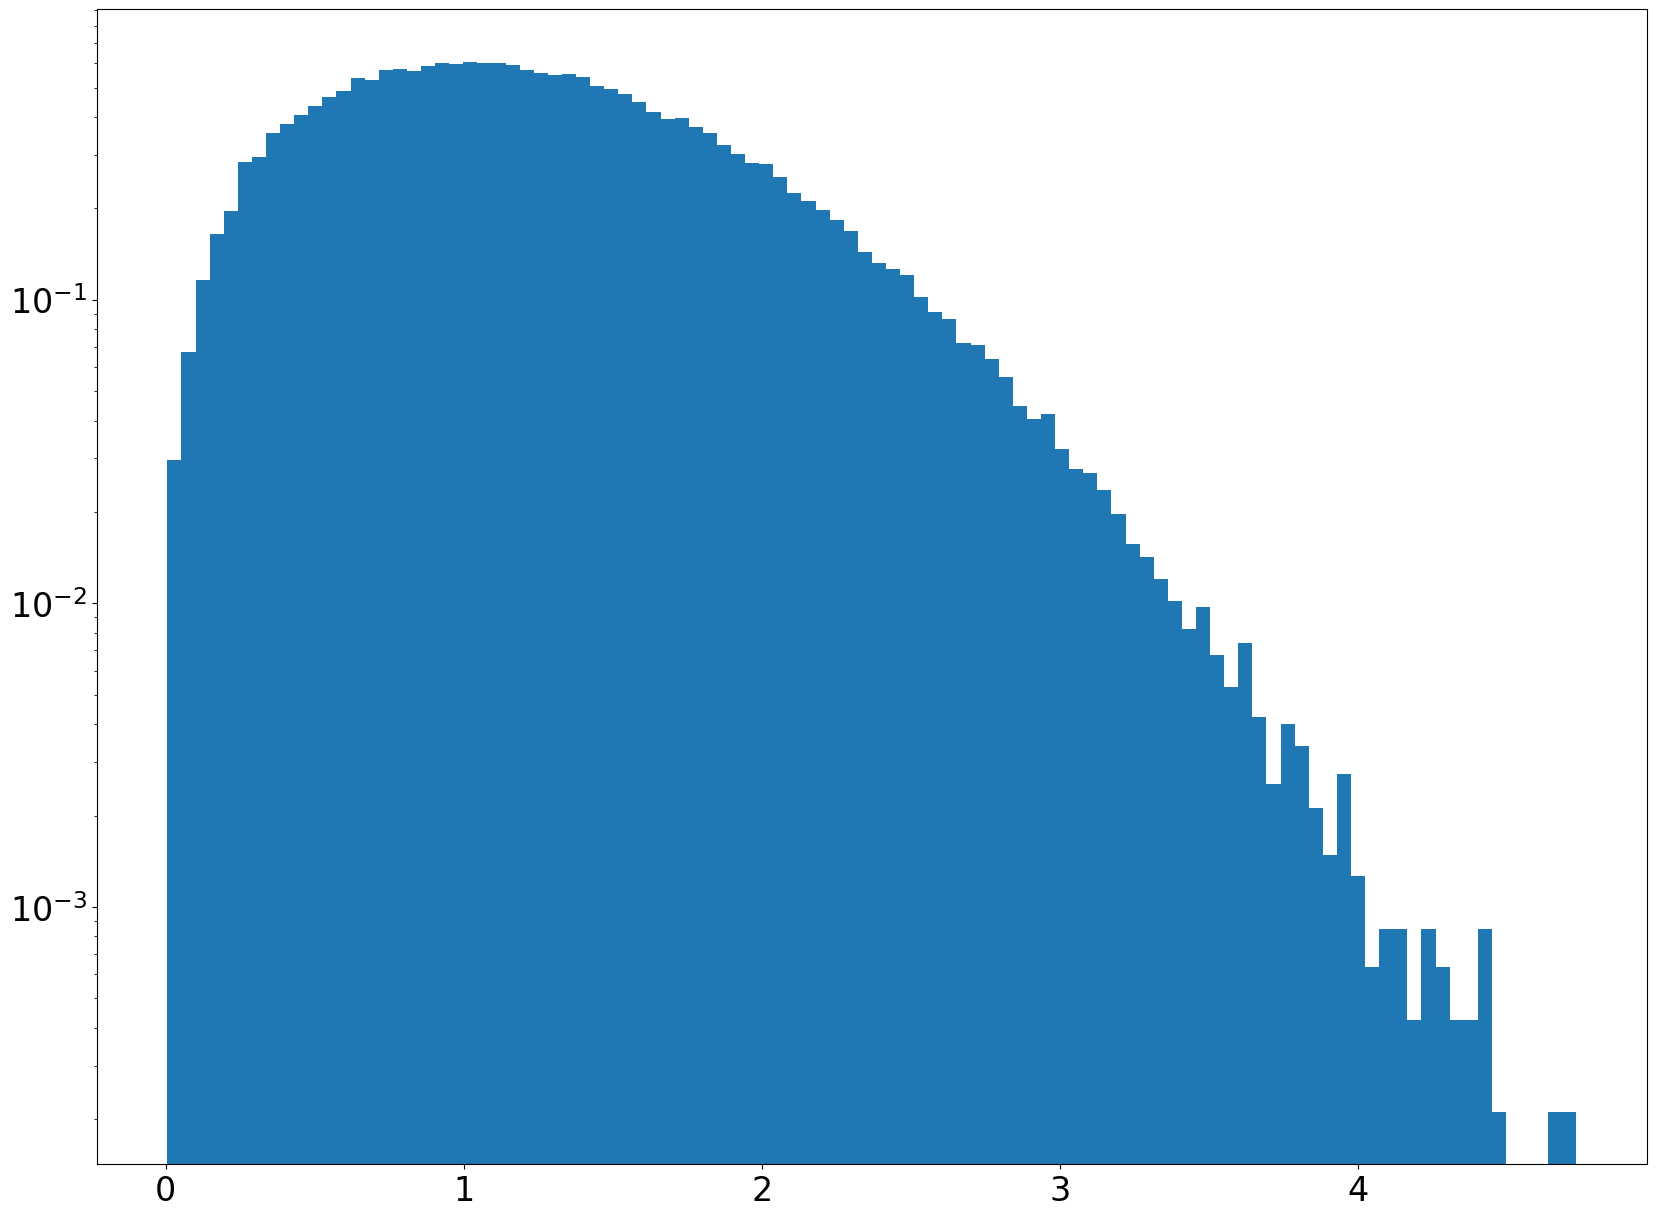

In [40]:
fig, ax = plt.subplots(1, 1)
ax.hist(z,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

Transforming the 2d gaussian distribtion into a 1d distribution by taking the square root of the square of the x and y components similar to a vector results in a rayleigh distribution. Knowing this we can take use this resulting rayleigh distribution to determine what value would produce a 5 sigma event. This is done by taking the probability for a 5 sigma event which is 1/3e6 plugging that in to the inverse survival function which computes a value of about 5.46

In [42]:
sigma_5= 1/3e6

In [43]:
prob_2d=stats.norm.isf(sigma_5)
prob_2d

4.970830636716245

In [44]:
stats.rayleigh.sf(prob_2d)

4.309974331398204e-06

In [14]:
stats.rayleigh.ppf(sigma_5)

0.0008164966489691201

In [15]:
stats.rayleigh.isf(sigma_5)

5.461524118161959

# Problem 3

In [48]:
x= np.arange(0,10)

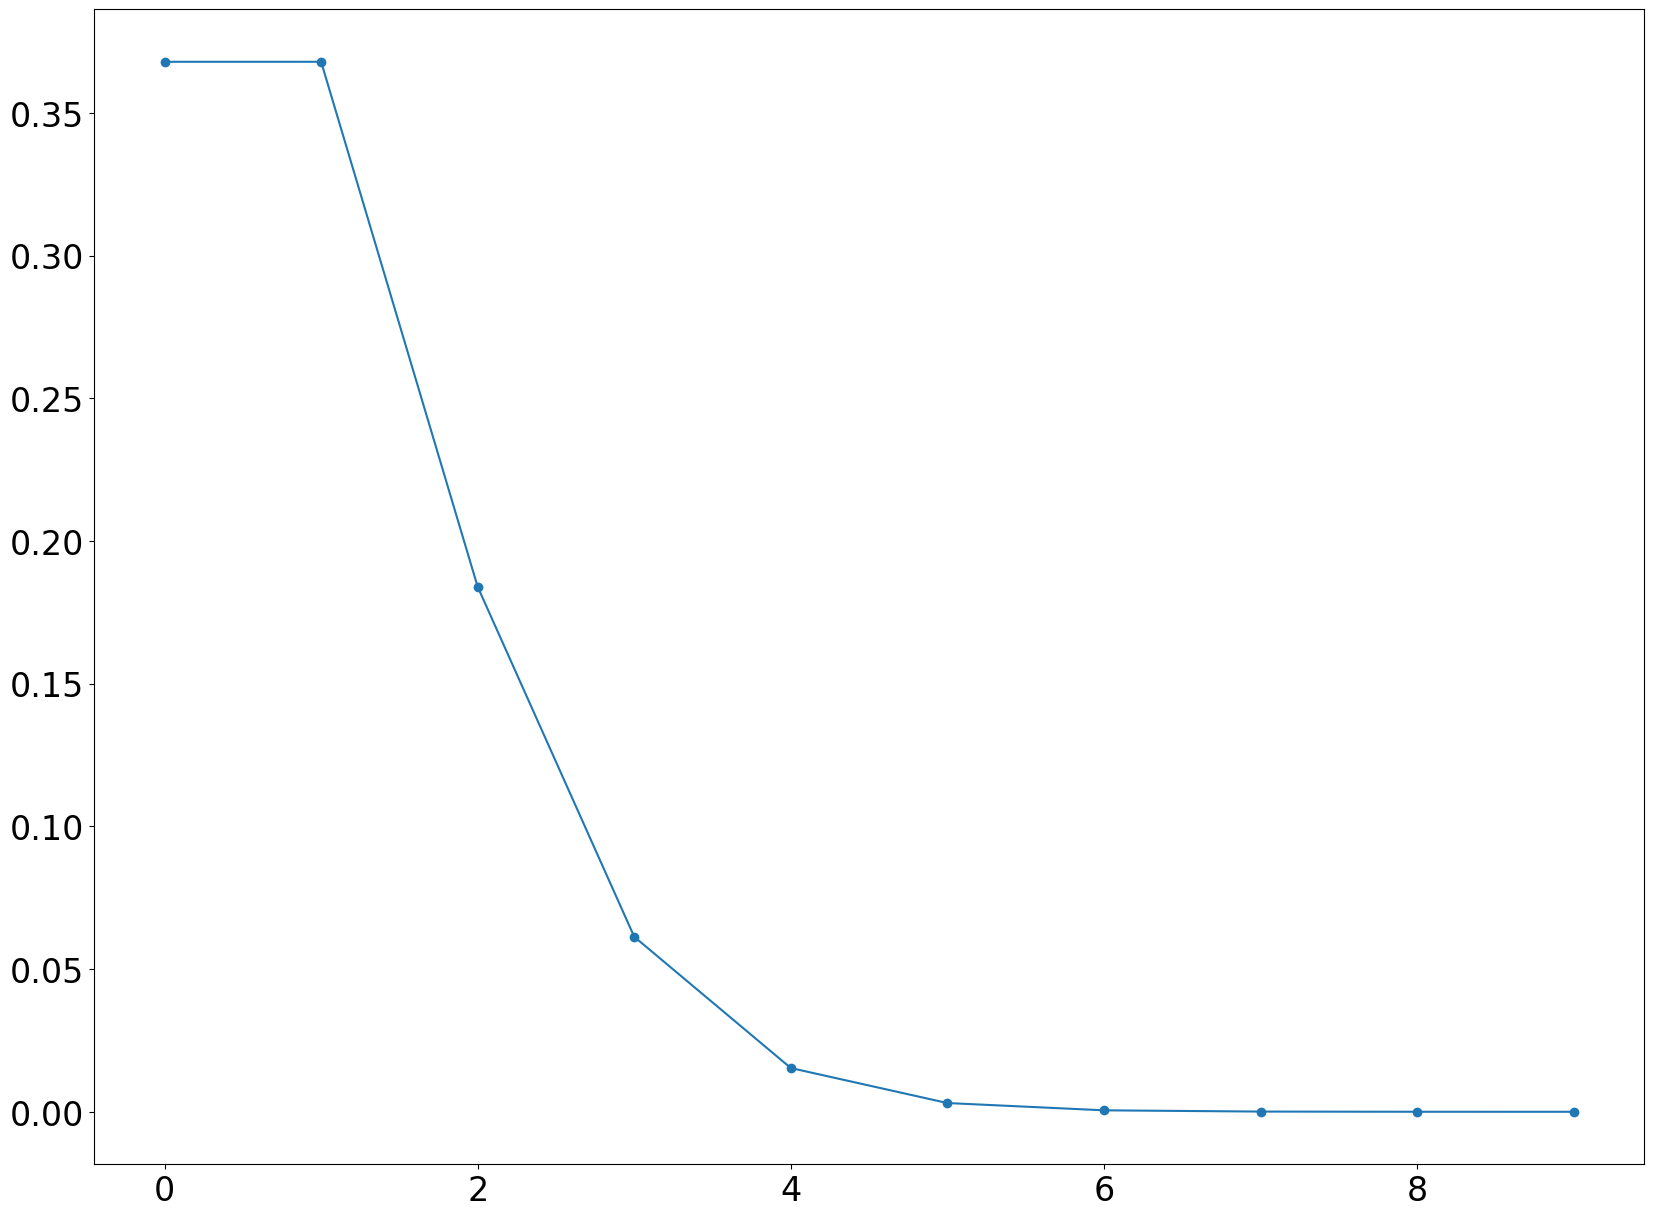

In [52]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.poisson.pmf(x,1),'o-')
plt.tick_params(labelsize = 24)
#plt.yscale('log')
plt.show()

In [62]:
poiss= stats.poisson.pmf(x,1)

In [63]:
poiss_15d= 7200*poiss

In [64]:
len(poiss_15d)

10

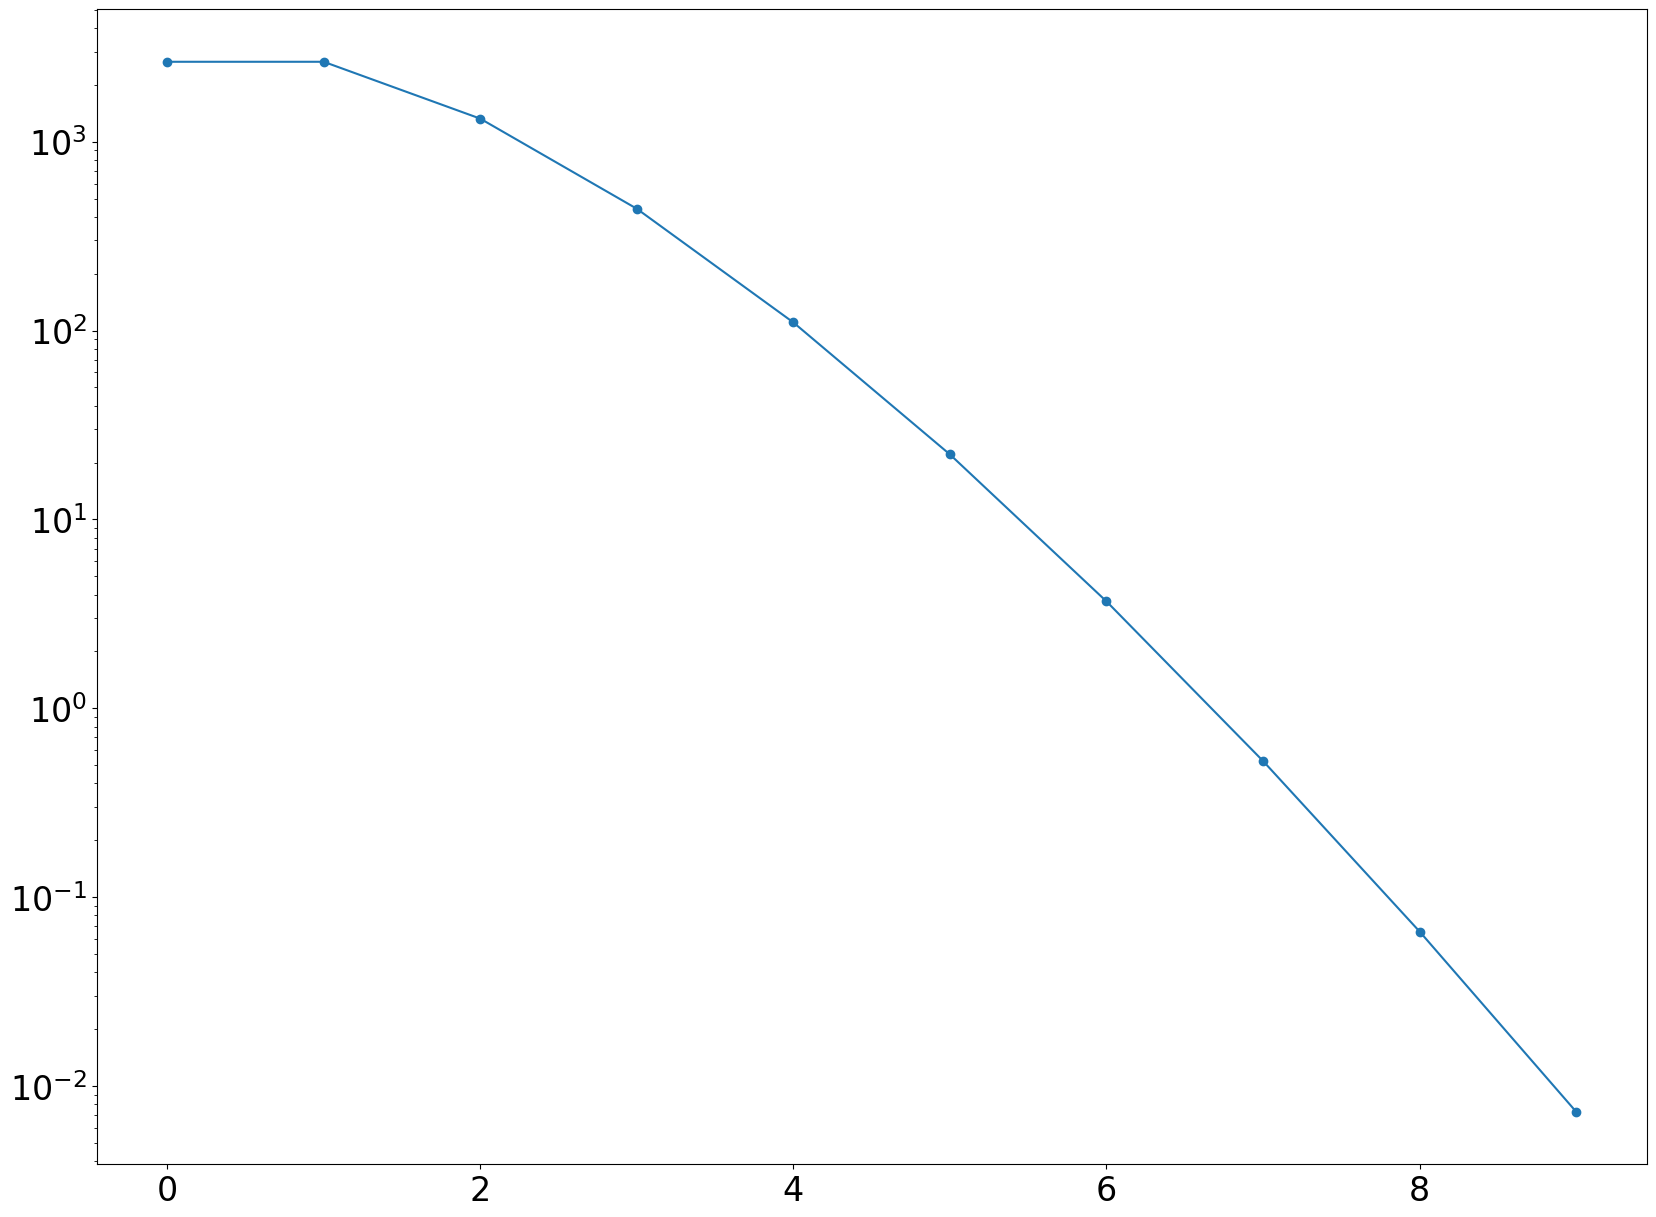

In [67]:
x_15d= np.arange(0, len(poiss_15d))
fig, ax = plt.subplots(1, 1)
ax.plot(x_15d, poiss_15d,'o-')
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()

While observing over 15 days, what is the probablity the background will produce 6800 cosmic rays?

To mathematically solve this question we need to take a poisson distribution and convolve it over the 15 days which is equivalent to 7200 minutes. By multiplying the poission distribution for 1 minute with an average of 1 cosmic ray during time period by the 7200 minutes we can get the averaged background distribtution over the 15 days. This distribution must then be integrated from the 6800 to infinity to determine the probability which then can be converted to a sigma value. 

In [26]:
stats.poisson.sf(6800/7200,1)

0.6321205588285577

In [28]:
stats.norm.isf(0.6321205588285577)

-0.33747496376420244